# Matplotlib tutorial using iris data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# 1. get iris data

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

# 2. matplotlib key concepts

## 2.1 general
* matplotlib is a complete plotting package that offers in the same time high level commands to assist users to visualize their data as simple as possible. but have also the ability to use low level commands 

* In this tutorial we will use the top level commands provided by the matplotlib.pyplot module that we have just imported `import matplotlib.pyplot as plt`

* plt behave as matlab so users experienced with matlab plotting will be most familiar with plt

* the low level commands are used generally to embed plots to GUI

## 2.2 Parts of a figure

![Alt text](https://matplotlib.org/_images/anatomy.png)

### 2.2.1 Figure
* A figure in matplotlib is the whole figure
* the previous image is a figure
* A figure can have none or more axes (see below for the definition of axe), we say that axes are childs of the figure
* to create an empty figure we use the command : `fig = plt.figure`

In [3]:
# create an empty figure (figure with 0 axes)
fig = plt.figure()
fig.suptitle("title of an empty figure")
fig.show() 

d:\Users\mkl\AppData\Local\Continuum\miniconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


<Figure size 432x288 with 0 Axes>

* to create a figure with multiple subplots or axes, we use the commande : in this case we create a figure with 4 axes in a grid of shape (2,2) 
```
fig, ax_list = plt.subplots(nrows=2, ncols=2)
```

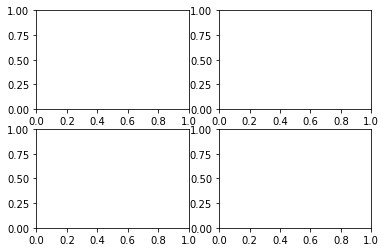

In [4]:
# create a figure with a set of subplots (axes)
fig, ax_list = plt.subplots(nrows=2, ncols=2)
fig.show()

### 2.2.1 Axes
* this is what we think of as a plot
* So a figure can have multiple **axes**, nut each **axe** is associated to one figure
* Each axe contain 2 **axis** (or 3 in case of 3D) the define the data limit
* Be aware of the difference between **axes** and **axis** 
* to get the axes of a figure we use the `get_children` figure's method or we use the ax_list matrix parameter above
* the data limits can be controlled using the `set_xlim` and `set_ylim` axes methodes
* each axe has a title (`set_title` method), an x-label (`set_xlabel`) and an y-label (`set_ylabel`)  

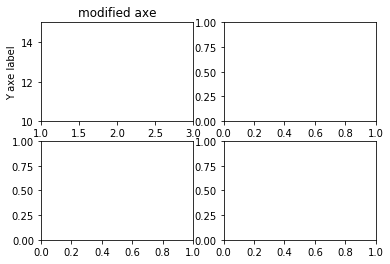

In [5]:
# get axe (1,1) using ax_list parameter
fig, ax_list = plt.subplots(nrows=2, ncols=2)
axe00 = ax_list[0,0] # get axe in position (1,1) in the grid
axe00.set_xlim(left=1, right=3) # set x_min and x_max
axe00.set_ylim(bottom=10, top=15) # set y_max and y_min
axe00.set_title("modified axe") # add title
axe00.set_ylabel(ylabel="Y axe label") # set y label
fig.show()

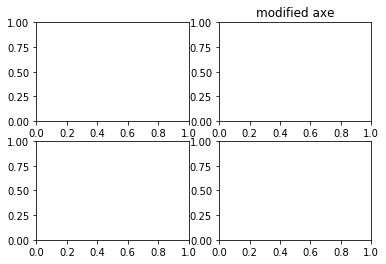

In [6]:
fig, ax_list = plt.subplots(nrows=2, ncols=2)
ax01 = fig.get_children()[2] # get second figure's axe 
ax01.set_title("modified axe")
fig.show()

## 2.1 type of inputs to matplotlib 
* matplotlib plot functions expect numpy array or numpy masked array as input type

* classes that are array like like pandas dataframes or matrix my not properly work, so it is best to convert them to numpy array before giving them to a matplotlib plot function 

# 3. Examples

In [7]:
import numpy as np

## 3.1 simple examples

### 3.1.2 example with one axe

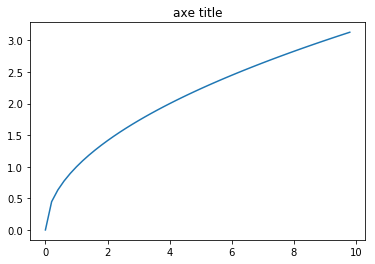

In [8]:
x = np.arange(0,10,0.2)
y = np.sqrt(x)
fig, axe = plt.subplots()
axe.set_title("axe title")
axe.plot(x, y)
plt.show()

### 3.1.2 example with multiple axes

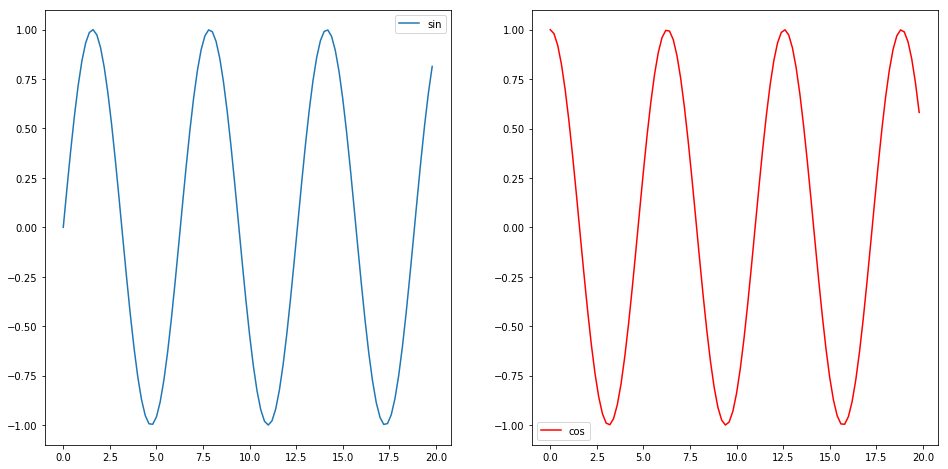

In [9]:
x = np.arange(0,20,0.2)
y1 = np.sin(x)
y2 = np.cos(x)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.plot(x, y1, label="sin")
ax1.legend() # place label legend on the axe
ax2.plot(x, y2, label = "cos", color="red")
ax2.legend()
plt.show()


## 3.2 examples with iris data

In [10]:
X = iris.data
y = iris.target

### 3.2.1 scatter plot

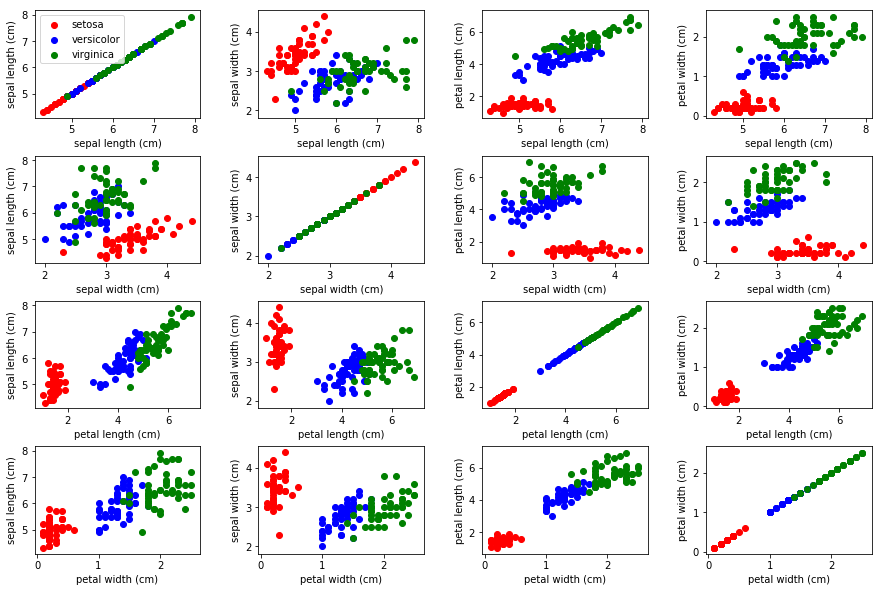

In [11]:
fig, axs = plt.subplots(4,4, figsize=(15,10)) 
fig.subplots_adjust(wspace=0.35, hspace=0.35)
c_dict = {0:"red", 1:"blue", 2: "green"} # dict to map classes to colors
for i in range(4): 
    for j in range(4): # for each (i,j) features
        for c in range(3): # for each class
            i_c = np.where(y == c)  # indices of the class
            axs[i, j].scatter(X[:,i][i_c], X[:,j][i_c], c=c_dict[c], label=iris.target_names[c])
            if (i,j)==(0,0):
                axs[i, j].legend()
            axs[i, j].set_xlabel(iris.feature_names[i])
            axs[i, j].set_ylabel(iris.feature_names[j])

### 3.2.1 box plot

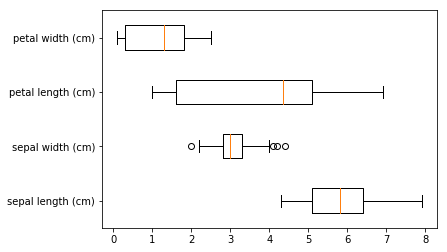

In [12]:
fig, ax = plt.subplots()
ax.boxplot(X, vert=False, labels=iris.feature_names) # vert=False to make plot horizontal
plt.show()

### 3.2.1 hist plot

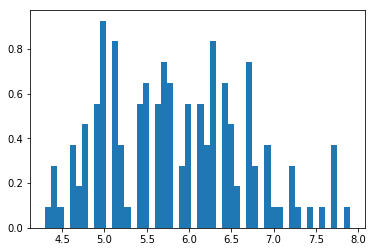

In [13]:
plt.hist(X[:,0], density=True, bins=50)
plt.show()

### 3.2.1 density plot

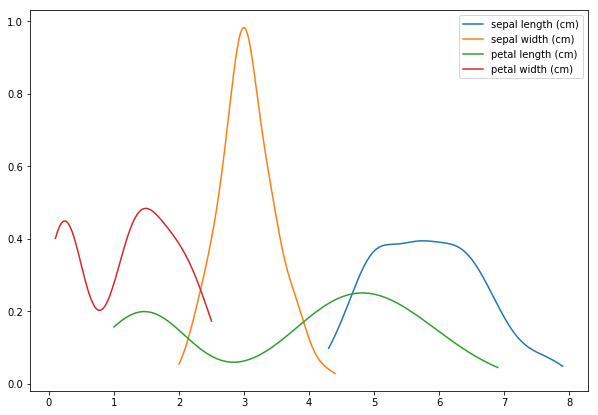

In [14]:
from scipy import stats
fig, ax = plt.subplots(figsize=(10,7))
for i in range(4):
    kde = stats.gaussian_kde(X[:,i])
    xx = np.linspace(np.min(X[:,i]), np.max(X[:,i]), 1000)
    ax.plot(xx, kde(xx), label = iris.feature_names[i])
    ax.legend()
plt.show()

# 4. Seaborn
* Seaborn is a high level interface built on top of matplotlib
* it is a python library for making statistical graphics
* closely integrated with pandas data structures ( series and dataframes) 
* and it is a dataset oriented visualization tool, to plot and  examine relationships between variables 

In [15]:
import pandas as pd
import seaborn as sns
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["species"] = y
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4.1 examples

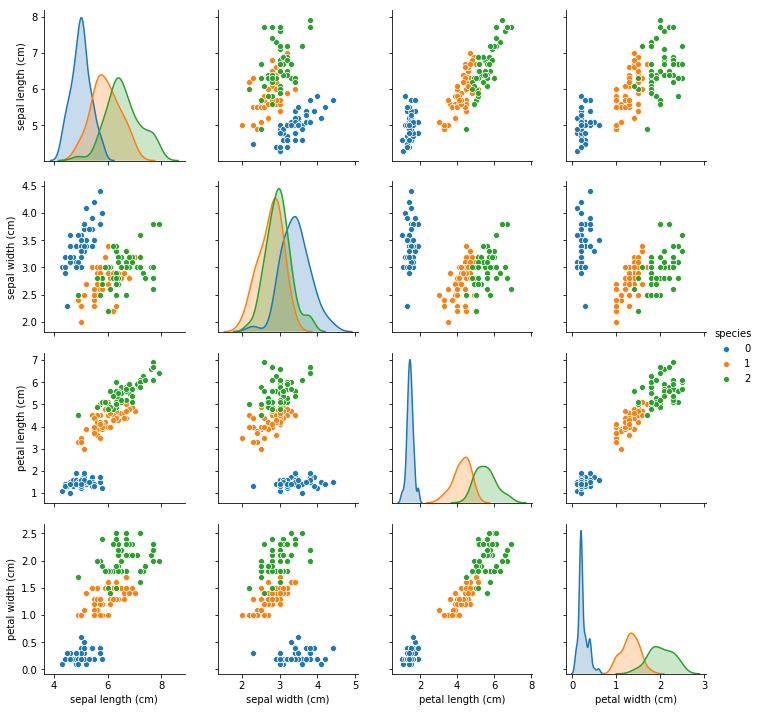

In [16]:
sns.pairplot(data=iris_df, vars=iris.feature_names, hue="species")

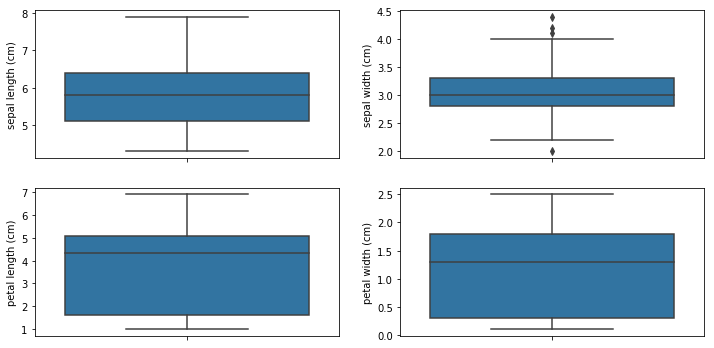

In [39]:
fig, list_ax = plt.subplots(2,2, figsize=(12,6))
for i in range(4):
    sns.boxplot(x=iris_df.columns[i], data = iris_df, ax=fig.get_children()[i+1], orient="v")

In [34]:
fig.get_children()[1]

# 5. Pandas plot
* on the data structure of pandas there is a method plot used to visualiaze Pandas series and dataframes
*  `pandas.DataFrame.plot()` and `pandas.Series.plot()`
* These are methods implemented in pandas using matplotlib so that we can plot pandas dataframes and series using only pandas package 

## 5.1 exemples

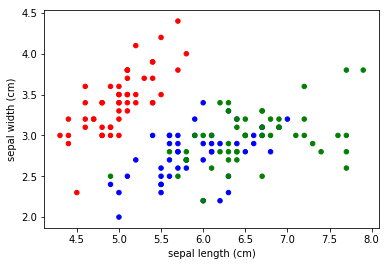

In [60]:
iris_df.plot.scatter(x="sepal length (cm)", y="sepal width (cm)", c=iris_df["species"].apply(lambda x: c_dict[x]))

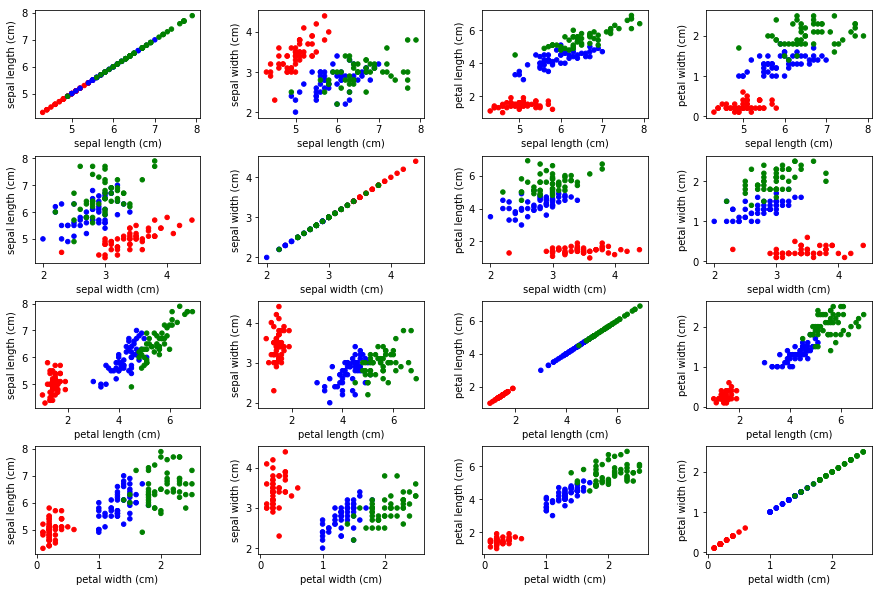

In [69]:
fig, axs = plt.subplots(4,4, figsize=(15,10)) 
fig.subplots_adjust(wspace=0.35, hspace=0.35)
for i, col1 in enumerate(iris_df.columns.tolist()[:-1]): 
    for j, col2 in enumerate(iris_df.columns.tolist()[:-1]):
        iris_df.plot.scatter(x=col1, y=col2, c=iris_df["species"].apply(lambda x: c_dict[x]), ax = axs[i, j])

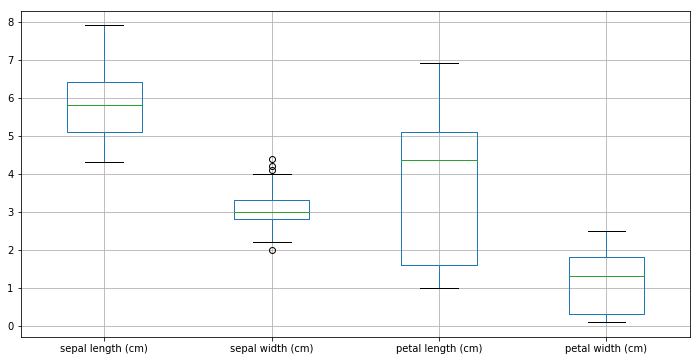

In [48]:
iris_df.boxplot(column=iris_df.columns[:-1].tolist(), figsize=(12,6))

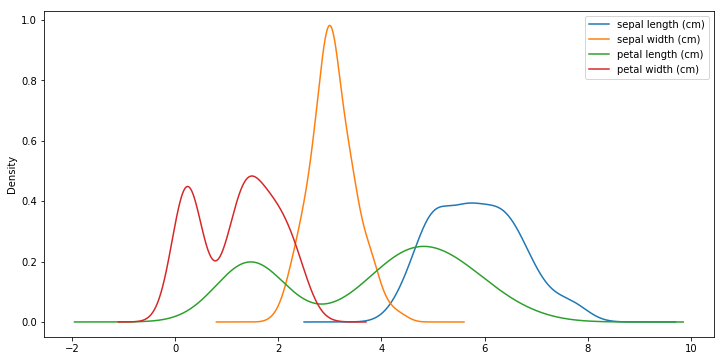

In [58]:
iris_df.iloc[:,:-1].plot.density(figsize=(12,6))